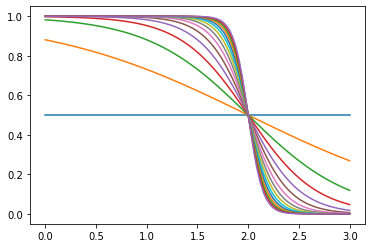

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

z = np.linspace(0,3,100)

def rho_tanh(redshift,rho_0=0.7, rho_1 = 2.0):
    return(rho_0*np.tanh((rho_1-redshift)/0.1))

def rho_sigm(redshift,rho_0=1., rho_1 = 2.0, xi = 10):
    return(rho_0 - rho_0/(1+np.exp(-xi*(redshift-rho_1) )))


#plt.plot(z,rho_tanh(redshift=z))

for ii in range(15):
    plt.plot(z,rho_sigm(redshift=z, xi=ii))
#plt.plot(z,fz)

-1.2500000000000275
-0.9000000000027777


C:\Users\52811\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


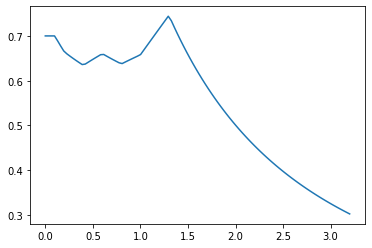

In [32]:
#intento de integrales


from scipy.integrate import quad
from scipy.integrate import trapz
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#ecuacion de estado de la energia oscura en forma de bines

def eos(z, xi):
    w_i = [-1 ,-1.2 ,-1.1 ,-0.9 ,-1.1 ,-0.9,-0.7,-1.5]
    #w_i = [1,1,1,1,1,1,2,2]
    z_i = np.linspace(0.0,3.0,len(w_i)+1)
    #z_i = [0  ,0.1  ,0.2  , 0.4 , 0.6 , 0.8, 1.0 ,1.3]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],xi)
    return w

y = [-1 ,-1.2 ,-1.1 ,-0.9 ,-1.1 ,-0.9,-0.7,-1.5]
x = np.linspace(0.0,2.625,len(y))
d = (x[1]-x[0])/2.
x = np.linspace(0.0+d,2.625+d,len(y))
f = interp1d(x, y, kind='linear')


#valor de la integral para la rho de la energia oscura
z_intervalo=2.5
#quad(lambda b: 3.0*(1.0+eos(b))/(1.0+b),0.0,z_intervalo)[0]
r=quad(lambda b: eos(b,0.01)/2.0,0.0,z_intervalo)[0]
print(r)
print(eos(2,0.01))

z=np.linspace(0.0,3.2,100)
#plt.plot(z,eos(z,0.001))
#plt.plot(z,eos(z,0.1))
#plt.plot(x,f(x), linestyle='--')
#plt.ylabel(r'f(z)')
#plt.xlabel(r'z')
#plt.legend((r'$\xi = 0.01$',r'$\xi = 0.1$',r'Linear interp.'))


#aqui ya esta la funcion lista en una sola definicion que devuelve el valor de la integral para SimpleMC
def luisfunction(z_l):
    def eos(z):
        w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]
        z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]
        def bines(w_2,w_1,z_2,z_1,eta):
            return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
        w=w_i[0]
        for jj in range(len(w_i)-1):
            w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],0.001)
        return w
    
    return quad(lambda b: 3*(1+eos(b))/(1+b),0,z_l)[0]

lf = []
for ii in range(len(z)):
    lf+=[0.7*np.exp(luisfunction(z[ii]))]

plt.plot(z,lf)

In [37]:
w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]
z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3]
trapz([1,1,1,1])

3.0

In [40]:
z[:5]

array([0.        , 0.03232323, 0.06464646, 0.0969697 , 0.12929293])

In [51]:
r=quad(lambda b: eos(b,0.01)/(1+b),0.0,2.5)[0]
print(r)

z_prueba=np.linspace(0,2.5,10000)
trapz(eos(z_prueba,0.01)/(1+z_prueba),z_prueba)


-1.2836433872805058


-1.2836433921922026

In [54]:
trapz([-1,1],[0,1])

0.0

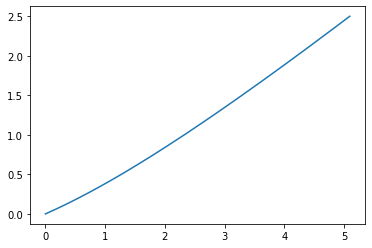

In [68]:
lf = []
for ii in range(len(z_prueba)):
    lf += [trapz((3.0*(1+z_prueba[:ii])/(1+2*z_prueba[:ii])),z_prueba[:ii])]
plt.plot(lf,z_prueba)
